In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder

print('Libraries ready')

Libraries ready


In [4]:
#Loading the data
df = pd.read_csv('realtor-data.csv')

In [5]:
# Drop all rows with missing values to ensure clean and complete data for modeling
df = df.dropna()
# Display the number of missing (NaN) values in each column of the dataset
print(df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [6]:
#Display the first few rows
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [7]:
#Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45320 entries, 502 to 155055
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     45320 non-null  float64
 1   status          45320 non-null  object 
 2   price           45320 non-null  float64
 3   bed             45320 non-null  float64
 4   bath            45320 non-null  float64
 5   acre_lot        45320 non-null  float64
 6   street          45320 non-null  float64
 7   city            45320 non-null  object 
 8   state           45320 non-null  object 
 9   zip_code        45320 non-null  float64
 10  house_size      45320 non-null  float64
 11  prev_sold_date  45320 non-null  object 
dtypes: float64(8), object(4)
memory usage: 5.5+ MB


In [8]:
#Display a statistical summary
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,45320.000000,4.532000e+04,45320.000000,45320.000000,45320.000000,4.532000e+04,45320.000000,45320.000000
mean,51040.579060,7.140030e+05,3.653266,2.612268,18.634376,9.203768e+05,10310.652096,2244.079700
std,30939.202771,1.496658e+06,1.470927,1.474069,799.548267,5.175954e+05,4796.312810,1885.851473
min,32.000000,1.000000e+00,1.000000,1.000000,0.000000,4.584000e+03,802.000000,170.000000
25%,22611.000000,2.450000e+05,3.000000,2.000000,0.100000,4.834405e+05,6840.000000,1320.000000
50%,49502.000000,3.990000e+05,3.000000,2.000000,0.220000,9.167815e+05,10460.000000,1800.000000
75%,78723.000000,6.990000e+05,4.000000,3.000000,0.600000,1.366230e+06,12993.750000,2571.000000
max,110138.000000,6.000000e+07,75.000000,39.000000,86139.000000,1.999512e+06,19977.000000,85142.000000


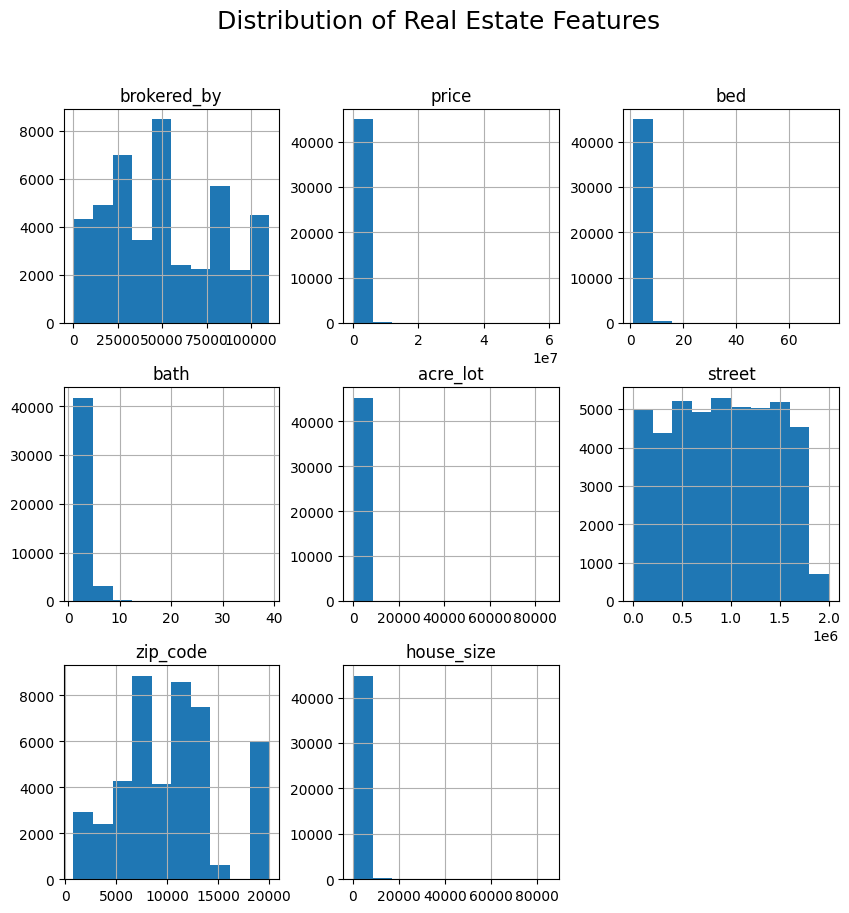

In [9]:
# Plot histogram for all numerical columns in the Dataframe to visualize their distributions
df.hist(figsize=(10, 10))
plt.suptitle('Distribution of Real Estate Features', fontsize=18)
plt.show()

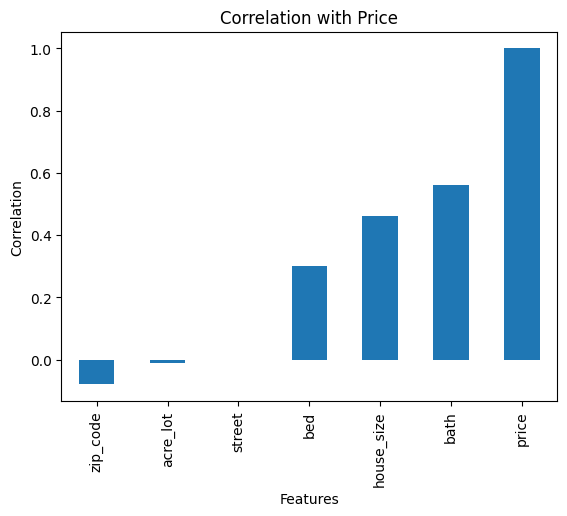

In [10]:
#Plot correlation of price with other features
corr = df.corr(numeric_only=True).round(2)
corr['price'][1:].sort_values().plot(kind='bar')
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

Text(0, 0.5, 'Frequency')

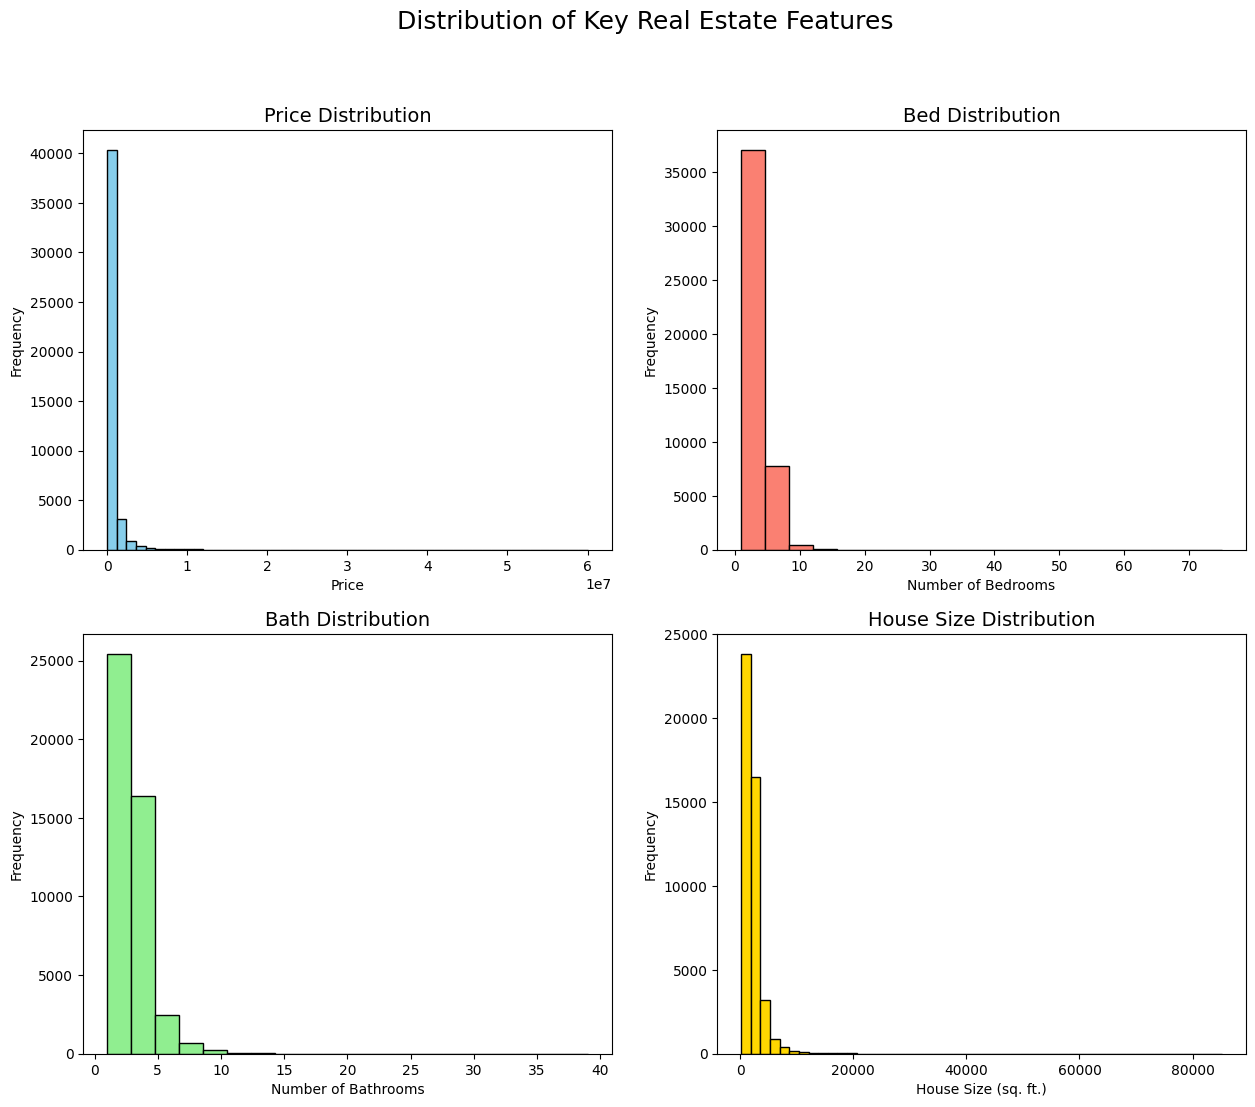

In [11]:
# Create a figure and a 2x2 grid of subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution of Key Real Estate Features', fontsize=18)

# Plot histograms on each subplot
axes[0, 0].hist(df['price'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['bed'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Bed Distribution', fontsize=14)
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['bath'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Bath Distribution', fontsize=14)
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['house_size'], bins=50, color='gold', edgecolor='black')
axes[1, 1].set_title('House Size Distribution', fontsize=14)
axes[1, 1].set_xlabel('House Size (sq. ft.)')
axes[1, 1].set_ylabel('Frequency')

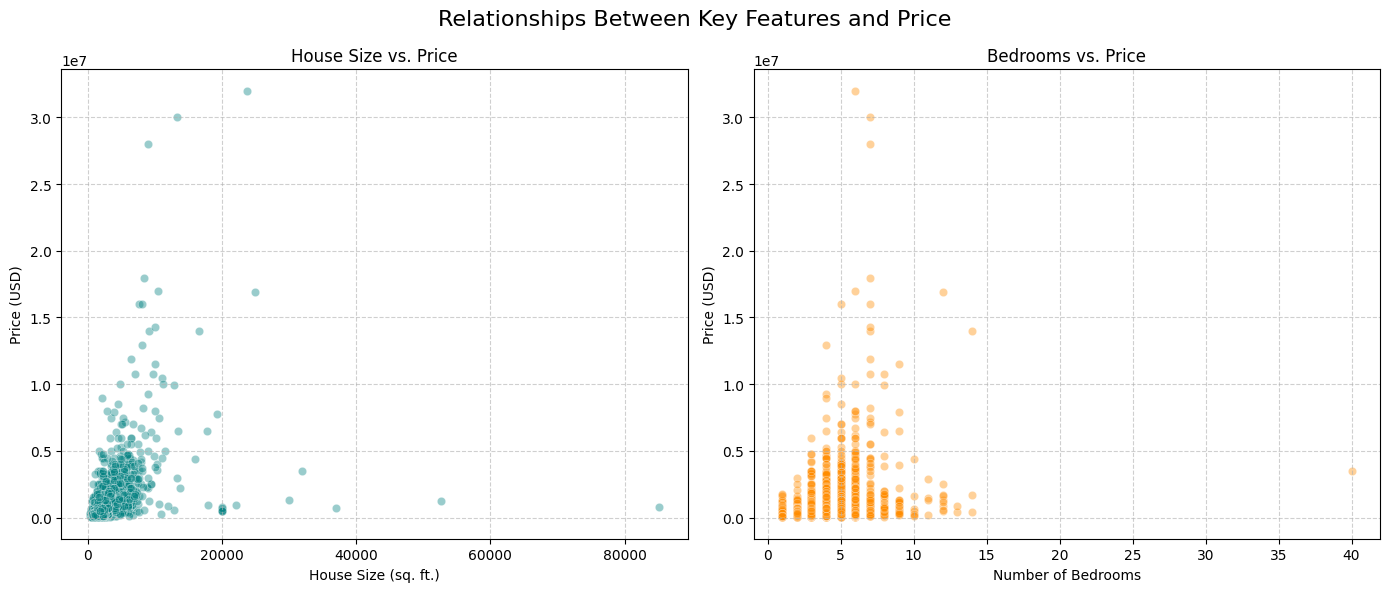

In [14]:
# side by side scatterplots for easier comparison in one figure.
sample_df = df.sample(5000, random_state=42)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(data=sample_df, x='house_size', y='price', alpha=0.4, color='teal', ax=axes[0])
axes[0].set_title('House Size vs. Price')
axes[0].set_xlabel('House Size (sq. ft.)')
axes[0].set_ylabel('Price (USD)')
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.scatterplot(data=sample_df, x='bed', y='price', alpha=0.4, color='darkorange', ax=axes[1])
axes[1].set_title('Bedrooms vs. Price')
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Price (USD)')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Relationships Between Key Features and Price', fontsize=16)
plt.tight_layout()
plt.show()


In [15]:
#Describe price baseline
print(df['price'].describe().round(2))

count       45320.00
mean       714003.02
std       1496658.31
min             1.00
25%        245000.00
50%        399000.00
75%        699000.00
max      60000000.00
Name: price, dtype: float64


In [16]:
#Create price categories
bins = [0, 200000, 500000, 1000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Luxury']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

print(df['price_category'].value_counts())

price_category
Medium    19566
High      11313
Low        8368
Luxury     6073
Name: count, dtype: int64


In [17]:
# Copy dataset
df_encoded = df.copy()

# Label encode high-cardinality columns
label_cols = ['city', 'state', 'street']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode small categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['status'], drop_first=True)

# Features & target
X = df_encoded.drop(['price', 'prev_sold_date', 'price_category'], axis=1)
y = df_encoded['price_category']

In [18]:
#Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
#Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Train Logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Evaluate
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5568181818181818
              precision    recall  f1-score   support

        High       0.50      0.33      0.40      2263
         Low       0.59      0.32      0.41      1674
      Luxury       0.74      0.50      0.59      1214
      Medium       0.54      0.81      0.65      3913

    accuracy                           0.56      9064
   macro avg       0.59      0.49      0.51      9064
weighted avg       0.57      0.56      0.54      9064



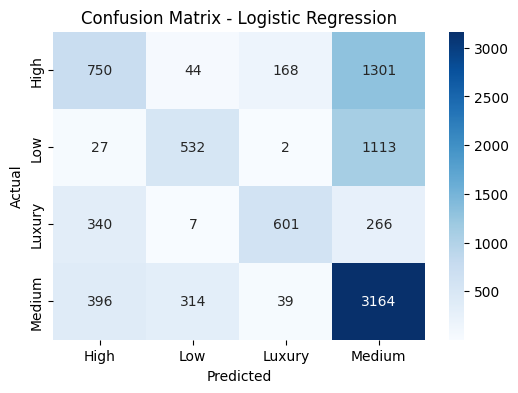

In [21]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [22]:
# Helper: evaluate model and return metrics dict
def evaluate_model(name, model, X_test, y_test, labels=None, plot_cm=True):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title(f'Confusion Matrix: {name}')
        plt.show()
    return {'model': name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best DecisionTree params: {'clf__max_depth': 10, 'clf__min_samples_split': 10}
--- Decision Tree (GridSearch) ---
Accuracy: 0.7116
              precision    recall  f1-score   support

        High       0.65      0.69      0.67      2263
         Low       0.73      0.63      0.68      1674
      Luxury       0.79      0.59      0.68      1214
      Medium       0.72      0.80      0.76      3913

    accuracy                           0.71      9064
   macro avg       0.72      0.68      0.70      9064
weighted avg       0.72      0.71      0.71      9064



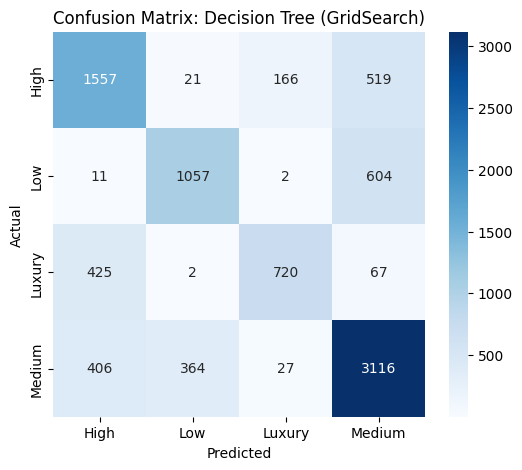

In [23]:
# Decision Tree with GridSearchCV
dt_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))])

dt_param_grid = {
    'clf__max_depth': [5, 10],
    'clf__min_samples_split': [2, 10],
}

dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy', verbose=1)
dt_grid.fit(X_train, y_train)

print('Best DecisionTree params:', dt_grid.best_params_)
dt_best = dt_grid.best_estimator_
dt_metrics = evaluate_model('Decision Tree (GridSearch)', dt_best, X_test, y_test, labels=np.unique(y_test))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best KNN params: {'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
--- KNN (GridSearch) ---
Accuracy: 0.6079
              precision    recall  f1-score   support

        High       0.52      0.56      0.54      2263
         Low       0.59      0.54      0.56      1674
      Luxury       0.66      0.58      0.62      1214
      Medium       0.65      0.67      0.66      3913

    accuracy                           0.61      9064
   macro avg       0.61      0.59      0.60      9064
weighted avg       0.61      0.61      0.61      9064



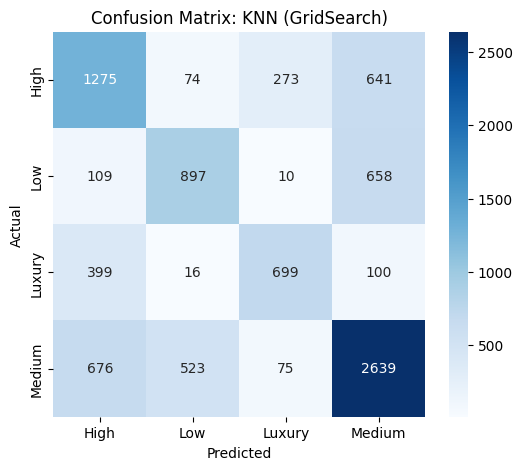

In [24]:
# k-NN with GridSearchCV
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform'],
}
knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=3, scoring='accuracy', verbose=1)
knn_grid.fit(X_train, y_train)

print('Best KNN params:', knn_grid.best_params_)
knn_best = knn_grid.best_estimator_
knn_metrics = evaluate_model('KNN (GridSearch)', knn_best, X_test, y_test, labels=np.unique(y_test))

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best SVM params: {'svc__gamma': 0.1, 'svc__C': 10}
--- SVM (Fast RandomizedSearch) ---
Accuracy: 0.5767
              precision    recall  f1-score   support

        High       0.49      0.44      0.46      2263
         Low       0.58      0.45      0.51      1674
      Luxury       0.68      0.49      0.57      1214
      Medium       0.59      0.74      0.66      3913

    accuracy                           0.58      9064
   macro avg       0.59      0.53      0.55      9064
weighted avg       0.58      0.58      0.57      9064



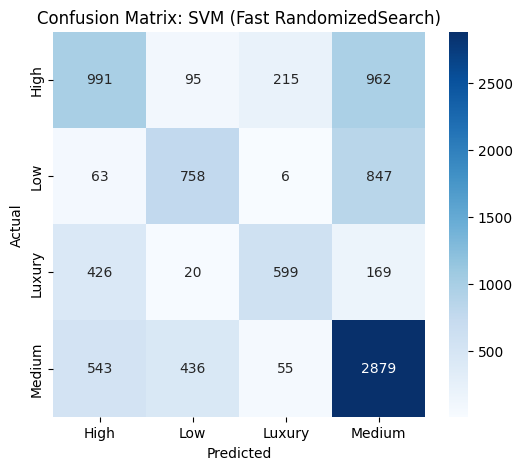

In [25]:
# SVM with RandomizedSearchCV
from scipy.stats import expon, uniform

svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])

# Smaller search space
param_dist = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.1],
}

# Fewer iterations and folds
svm_search = RandomizedSearchCV(svm_pipeline, param_distributions=param_dist, n_iter=3, cv=2, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

# Fit on a smaller subset
X_small = X_train[:2000]
y_small = y_train[:2000]

svm_search.fit(X_small, y_small)

print('Best SVM params:', svm_search.best_params_)
svm_best = svm_search.best_estimator_
svm_metrics = evaluate_model('SVM (Fast RandomizedSearch)', svm_best, X_test, y_test, labels=np.unique(y_test))

In [26]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Encode labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Multi-class classification network
num_classes = len(np.unique(y_train_enc))

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train_enc,
                    validation_data=(X_test, y_test_enc),
                    epochs=20,
                    batch_size=10,
                    verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test_enc, verbose=0)
print(f"Simple NN (Multi-class) Test Accuracy: {acc:.4f}")

Epoch 1/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5299 - loss: 1.0373 - val_accuracy: 0.5793 - val_loss: 0.9600
Epoch 2/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5737 - loss: 0.9581 - val_accuracy: 0.5888 - val_loss: 0.9407
Epoch 3/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5873 - loss: 0.9357 - val_accuracy: 0.6044 - val_loss: 0.9136
Epoch 4/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6073 - loss: 0.9054 - val_accuracy: 0.6230 - val_loss: 0.8872
Epoch 5/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6261 - loss: 0.8797 - val_accuracy: 0.6328 - val_loss: 0.8683
Epoch 6/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6364 - loss: 0.8598 - val_accuracy: 0.6418 - val_loss: 0.8556
Epoch 7/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6419 - loss: 0.8460 - val_accuracy: 0.6464 - val_loss: 0.8468
Epoch 8/20
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6455 - loss: 0.8364 - 

,accuracy,precision,recall,f1
model,,,,
Decision Tree (GridSearch),0.711606,0.715024,0.711606,0.709915
KNN (GridSearch),0.607899,0.609877,0.607899,0.607912
SVM (Fast RandomizedSearch),0.576677,0.576836,0.576677,0.569567


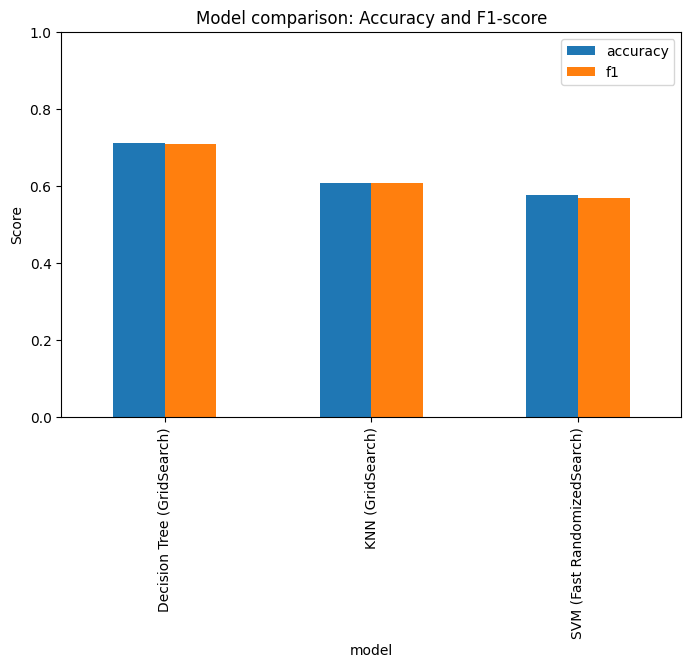

In [27]:
# Compile metrics from models into a DataFrame and plot comparison
metrics_list = []
for m in ['dt_metrics','knn_metrics','svm_metrics','nn_metrics']:
    if m in globals():
        metrics_list.append(globals()[m])

if len(metrics_list) > 0:
    results_df = pd.DataFrame(metrics_list).set_index('model')
    display(results_df)
    # Bar plot for accuracy & f1
    results_df[['accuracy','f1']].plot.bar(figsize=(8,5))
    plt.title('Model comparison: Accuracy and F1-score')
    plt.ylabel('Score')
    plt.ylim(0,1)
    plt.show()
else:
    print('No model metrics found yet. Run the model cells to populate metrics.')